In [2]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
matplotlib.rcParams.update({'font.size': 14})

In [6]:
DATASET_PATH = './train.csv'
PREPARED_DATASET_PATH = './test.csv'

In [7]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [8]:
# Проверяем пустые значения

In [9]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [ ]:
# Корректируем значения LifeSquare

In [10]:
df['LifeSquare_nan'] = 0
df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1
df['LifeSquare_nan'].value_counts()

0    7887
1    2113
Name: LifeSquare_nan, dtype: int64

In [11]:
median = df['LifeSquare'].median()
df['LifeSquare'] = df['LifeSquare'].fillna(median)

In [14]:
# Корректируем значения Healthcare_1

In [12]:
median = df['Healthcare_1'].median()
df['Healthcare_1'].fillna(median, inplace=True)

In [13]:
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,900.0,0,0,B,305018.871089,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,B,1,264,0,900.0,0,1,B,168106.007630,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,900.0,0,6,B,343995.102962,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,B,35,5776,1,2078.0,2,4,B,161044.944138,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,B,24,4860,1,80.0,0,3,B,142402.739272,0
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,B,37,7687,11,176.0,5,5,B,326174.175191,0
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,...,B,1,264,0,900.0,0,1,B,160400.401732,0
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,194756.023945,0


In [ ]:
# Визуализируем целевую переменную

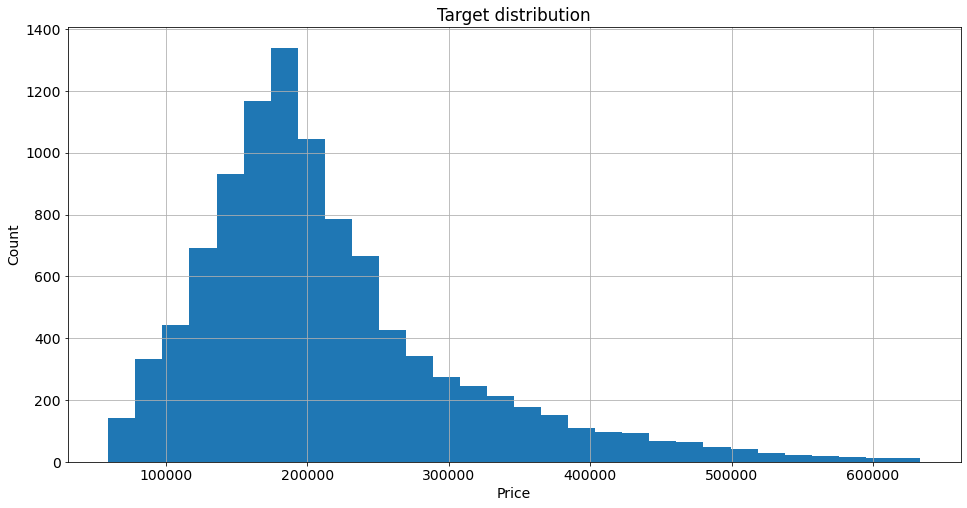

In [14]:
plt.figure(figsize = (16, 8))

df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [53]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,lifesq_oversq
count,10000.00000,10000.000000,10000.000000,10000.000000,9479.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.329456,34.317403,6.191300,8.526700,7.70040,1984.872400,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399,0.211300,0.583158
std,4859.01902,43.587592,0.839512,21.028169,15.298486,2.739024,5.241148,5.30406,18.416347,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865,0.408251,0.209236
min,0.00000,0.000000,0.000000,15.000000,10.000000,3.000000,1.000000,0.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,24.484228,3.000000,4.000000,4.00000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942,0.000000,0.517033
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,7.00000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,0.000000,0.598807
75%,12592.50000,75.000000,2.000000,65.900625,39.010546,8.000000,12.000000,11.00000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171,0.000000,0.679600
max,16798.00000,209.000000,19.000000,641.065193,638.163193,12.000000,42.000000,42.00000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,0.999949


In [ ]:
# Наблюдения за результатом функции описания данных
1. Максимальное значение жилой площади больше, чем максимальное значение площади. Что невозможно.
    Нужно ограничить жилую площадь на основе данных общей площади.
2. Максимальное значение площади кухни 2014, что вряд ли корректно. Значение 2014 вероятнее всего год.
3. Минимальные значения общей площади, жилой и кухни слишком маленькие - значения должны быть больше.
3. Максимальный этаж квартиры выше, чем этажность дома.
4. Неадекватное значение года постройки - больше чем текущий год.

In [20]:
# Обработка неподходящих данных

In [41]:
# Для данных, у которых значение жилой площади меньше, чем общей - вычислить соотношение жилой и общей.
# Для тех значений, гд соотношение меньше 1 определяем среднее.
# Далее для некорректных значений жилой площади определяем её как произведение общей на вычисленное значение среднего соотношения.


In [38]:
df['lifesq_oversq'] = 0
df.loc[df['Square'] > df['LifeSquare'], 'lifesq_oversq'] = (df['LifeSquare'] / df['Square'])
mean_lfsq_ovrsq = df.loc[df['lifesq_oversq'] > 0, ['lifesq_oversq']].mean()
df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = (df['Square'] * mean_lfsq_ovrsq)

In [45]:
# Корректируем минимальные значения площадей
df.loc[df['Square'] < 15, 'Square'] = 15
df.loc[df['LifeSquare'] < 10, 'LifeSquare'] = 10

In [43]:
# Корректируем значения площади кухни
condition = (df['KitchenSquare'].isna()) \
             | (df['KitchenSquare'] > df['KitchenSquare'].quantile(.975))
        
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()

df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [47]:
# Корректируем этажность дома. Если этаж больше этажности - указываем последний этаж дома.
df.loc[df['Floor'] < df['HouseFloor'], 'HouseFloor'] = df['Floor']

In [52]:
# Если год постройки позже текущего - заменяем на текущий.
current_year = (datetime.now().year - 1)
df.loc[df['HouseYear'] > current_year, 'HouseYear'] = current_year